In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pltz
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

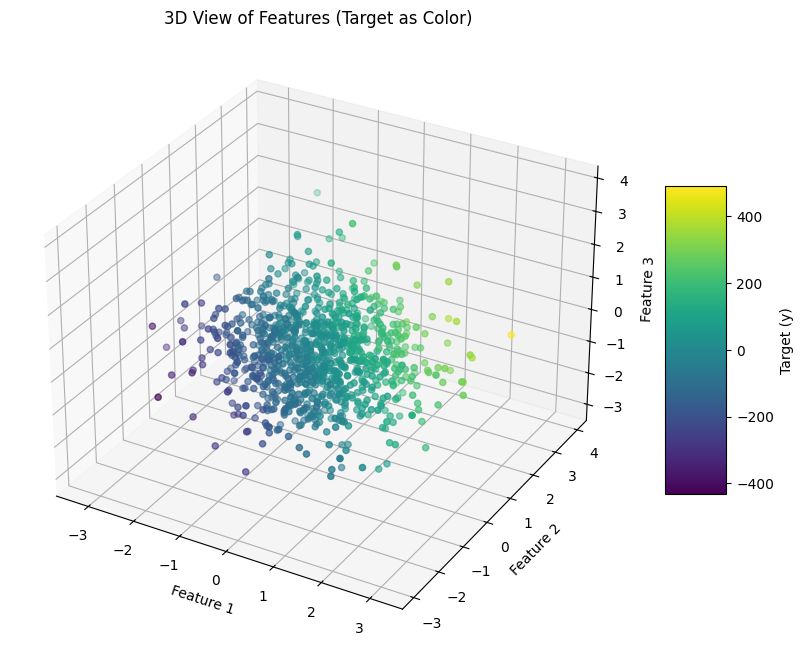

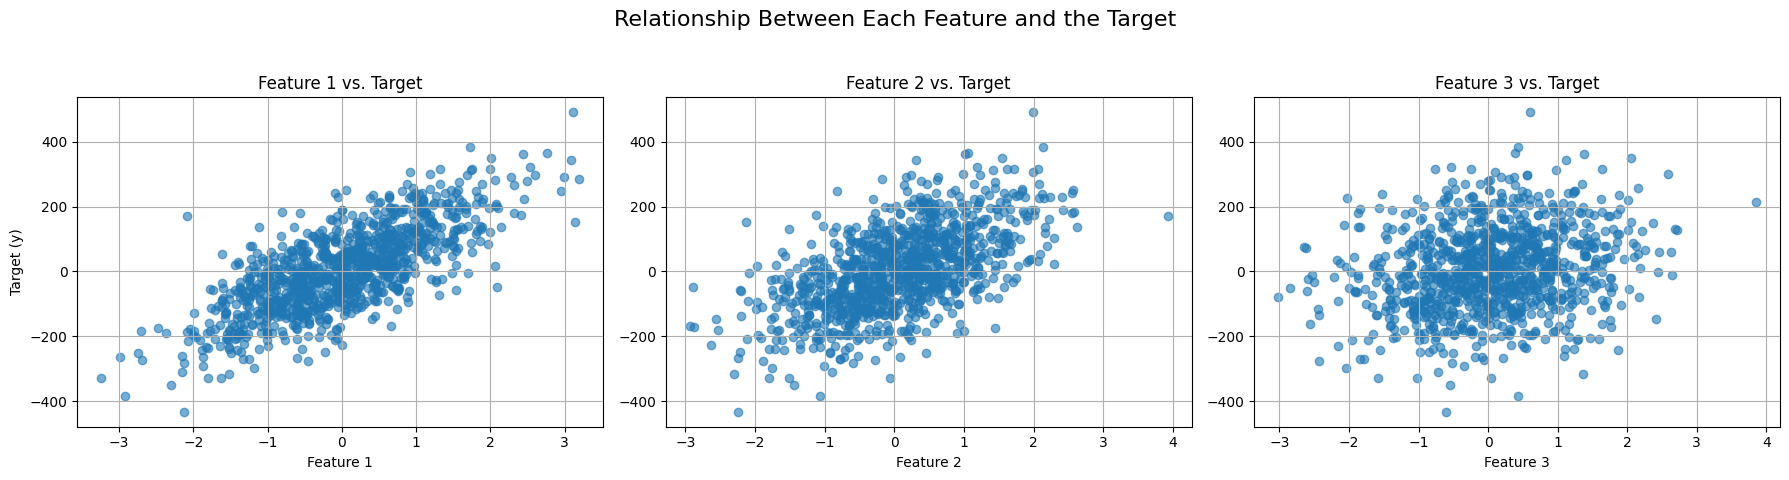

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# 1. Generate the same dataset as before
X, y, _ = make_regression(
    n_samples=1000,
    n_features=3,
    n_informative=3,
    noise=20,
    coef=True,
    random_state=42
)
# Reshape y to be a column vector (good practice)
y = y.reshape(-1, 1)


# --- Visualization 1: 3D Scatter Plot ---

# Create a figure and a 3D subplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
# X[:, 0] is the first feature (x-axis)
# X[:, 1] is the second feature (y-axis)
# X[:, 2] is the third feature (z-axis)
# c=y.flatten() sets the color of each point based on the target value
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y.flatten(), cmap='viridis')

# Set labels for the axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D View of Features (Target as Color)')

# Add a color bar to show the mapping of colors to target values
fig.colorbar(scatter, shrink=0.5, aspect=5, label='Target (y)')

# Show the plot
plt.show()


# --- Visualization 2: Individual Feature vs. Target Plots ---

# Create a figure and a set of subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Relationship Between Each Feature and the Target', fontsize=16)

# Plot for Feature 1 vs. Target
axes[0].scatter(X[:, 0], y, alpha=0.6)
axes[0].set_title('Feature 1 vs. Target')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Target (y)')
axes[0].grid(True)

# Plot for Feature 2 vs. Target
axes[1].scatter(X[:, 1], y, alpha=0.6)
axes[1].set_title('Feature 2 vs. Target')
axes[1].set_xlabel('Feature 2')
axes[1].grid(True)

# Plot for Feature 3 vs. Target
axes[2].scatter(X[:, 2], y, alpha=0.6)
axes[2].set_title('Feature 3 vs. Target')
axes[2].set_xlabel('Feature 3')
axes[2].grid(True)

# Adjust layout and show the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust for the main title
plt.show()

In [105]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print("For Linear Regression")
print("The R2 score is: ", r2_score(y_test, y_pred))
print("The cross val score is: ", np.mean(cross_val_score(lr, X, y, cv=10)))

For Linear Regression
The R2 score is:  0.975200316543229
The cross val score is:  0.9760950579468176


In [107]:
print(lr.coef_)
print(lr.intercept_)

[[98.49075624 83.98522139 25.71709099]]
[-0.89207967]


In [108]:
class BatchGD:
    def __init__(self, learning_rate, epochs):
        self.coef_ = None
        self.intercept_ = None
        self.learning_rate = learning_rate
        self.epochs = epochs
        
    def fit(self, x_train, y_train):
        self.coef_ = np.ones(x_train.shape[1])
        self.intercept_ = 0
        
        for i in range(self.epochs):
            
            y_hat = np.dot(x_train, self.coef_) + self.intercept_            
            loss_func = -2 * np.mean(y_train.ravel() - y_hat)
            step_size = self.learning_rate * loss_func
            self.intercept_ = self.intercept_ - step_size
            
            
            loss_func_co = -2 * np.dot((y_train.ravel() - y_hat), x_train) / x_train.shape[0]
            step_size_co = self.learning_rate * loss_func_co
            self.coef_ = self.coef_ - step_size_co
            
        print(self.coef_)
        print(self.intercept_)
            
    def predict(self, x_test):
        pred = np.dot(x_test ,  self.coef_) + self.intercept_
        return pred

In [109]:
model = BatchGD(learning_rate=0.1 ,epochs=100)
model.fit(x_train, y_train)

[98.49075614 83.98522118 25.71709099]
-0.8920795956058434


In [110]:
print(lr.coef_)
print(lr.intercept_)

[[98.49075624 83.98522139 25.71709099]]
[-0.89207967]


In [111]:
pred = model.predict(x_test)
print(r2_score(y_test, pred))

0.9752003166167669
